In [155]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# all selfish

In [66]:
results = { 'wins' : [], 'losses' : []}
for _ in tqdm(range(int(1e5))):
    state = np.array([0, 0, 1])
    steps = 0
    while 2 not in state:
        ind = np.random.randint(3)
        state[ind] += 1
        steps += 1
    if state[0] == 2:
        results['wins'].append(steps)
    else:
        results['losses'].append(steps)

100%|██████████| 100000/100000 [00:02<00:00, 43043.87it/s]


In [67]:
len(results['wins']) / int(1e5), np.mean(results['wins'])

(0.18461, 2.4026325767834895)

In [68]:
len(results['losses']) / int(1e5), np.mean(results['losses'])

(0.81539, 1.774500545751113)

In [108]:
def doAllSelfish(length=2, iters=int(1e5)):
    results = { 'wins' : [], 'losses' : []}
    for _ in tqdm(range(iters)):
        state = np.array([0, 0, 1])
        steps = 0
        while length not in state:
            ind = np.random.randint(3)
            state[ind] += 1
            steps += 1
        if state[0] == length:
            results['wins'].append(steps)
        else:
            results['losses'].append(steps)

    pwin = len(results['wins']) / iters
    lenwin = np.mean(results['wins'])
    
    plose = len(results['losses']) / iters
    lenlose = np.mean(results['losses'])
    
    return 1/3*lenwin - length + 1/pwin * 1/3 * plose * lenlose

In [114]:
doAllSelfish(length=6)

100%|██████████| 100000/100000 [00:09<00:00, 10483.23it/s]


8.15642252950413

# one selfish

In [40]:
results = { 'wins' : [], 'losses' : []}
for _ in tqdm(range(int(1e5))):
    state = np.array([0, 1])
    steps = 0
    while 2 not in state:
        ind = np.random.randint(3)
        if ind == 0:
            state[0] += 1
        else:
            state[1] += 1 
        steps += 1
    if state[0] == 2:
        results['wins'].append(steps)
    else:
        results['losses'].append(steps)

100%|██████████| 100000/100000 [00:01<00:00, 55210.42it/s]


In [41]:
len(results['wins']) / int(1e5), np.mean(results['wins'])

(0.11189, 2.0)

In [42]:
len(results['losses']) / int(1e5), np.mean(results['losses'])

(0.88811, 1.2491583249822658)

In [45]:
1.25 * 8 /9 *9

10.0

In [107]:
def doOneSelfish(length=2, iters=int(1e5)):
    results = { 'wins' : [], 'losses' : []}
    for _ in tqdm(range(iters)):
        state = np.array([0, 1])
        steps = 0
        while length not in state:
            ind = np.random.randint(3)
            if ind == 0:
                state[0] += 1
            else:
                state[1] += 1 
            steps += 1
        if state[0] == length:
            results['wins'].append(steps)
        else:
            results['losses'].append(steps)
    pwin = len(results['wins']) / iters
    lenwin = np.mean(results['wins'])
    
    plose = len(results['losses']) / iters
    lenlose = np.mean(results['losses'])
    
    return 1/3*lenwin - length + 1/pwin * 1/3 * plose * lenlose

In [119]:
doOneSelfish(length=6)

100%|██████████| 100000/100000 [00:06<00:00, 14799.86it/s]


25.913096802452912

# n-player 

In [120]:
def doAllSelfishNplayers(players=3, length=2, iters=int(1e5)):
    results = { 'wins' : [], 'losses' : []}
    for _ in tqdm(range(iters)):
        state = np.zeros(players)
        state[-1] = 1
        steps = 0
        while length not in state:
            ind = np.random.randint(players)
            state[ind] += 1
            steps += 1
        if state[0] == length:
            results['wins'].append(steps)
        else:
            results['losses'].append(steps)

    pwin = len(results['wins']) / iters
    lenwin = np.mean(results['wins'])
    
    plose = len(results['losses']) / iters
    lenlose = np.mean(results['losses'])
    
    return 1/players*lenwin - length + 1/pwin * 1/players * plose * lenlose

In [145]:
doAllSelfishNplayers(players=5, length=6)

100%|██████████| 100000/100000 [00:14<00:00, 6834.44it/s]


13.444071428571426

In [139]:
def doOneSelfishNplayers(players=3, length=2, iters=int(1e5)):
    results = { 'wins' : [], 'losses' : []}
    for _ in tqdm(range(iters)):
        state = np.array([0, 1])
        steps = 0
        while length not in state:
            ind = np.random.randint(players)
            if ind == 0:
                state[0] += 1
            else:
                state[1] += 1 
            steps += 1
        if state[0] == length:
            results['wins'].append(steps)
        else:
            results['losses'].append(steps)
    pwin = len(results['wins']) / iters
    lenwin = np.mean(results['wins'])
    
    plose = len(results['losses']) / iters
    lenlose = np.mean(results['losses'])
    return 1/players*lenwin - length + 1/pwin * 1/players * plose * lenlose

In [150]:
doOneSelfishNplayers(players=5, length=6)

100%|██████████| 100000/100000 [00:05<00:00, 17559.89it/s]


193.13652312599677

In [151]:
# plotting

In [170]:
data3p = np.array([[1.39, 1.99],
                     [2.98, 5.32],
                     [4.67, 9.99],
                     [6.15, 16.81],
                     [8.16, 25.91]])


data4p = np.array([
    [1.78,3.03],
    [3.82,9.60],
    [6.07,22.49],
    [8.42,43.44],
    [10.68,77.69],
])

data5p = np.array([
    [2.00,4.12],
    [4.66,15.05],
    [7.44,38.57],
    [10.36,94.22],
    [13.44,193.13]
])

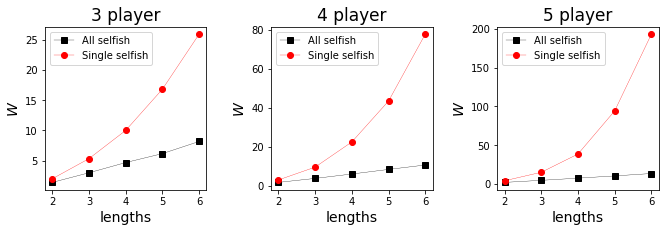

In [173]:
f, axarr = plt.subplots(ncols=3, figsize=(11,3))

lengths = np.arange(2,7)
axarr[0].plot(lengths, data3p[:,0], marker='s', color='k', linewidth=0.3, label='All selfish')
axarr[0].plot(lengths, data3p[:,1], marker='o', color='r', linewidth=0.3, label='Single selfish')

axarr[1].plot(lengths, data4p[:,0], marker='s', color='k', linewidth=0.3, label='All selfish')
axarr[1].plot(lengths, data4p[:,1], marker='o', color='r', linewidth=0.3, label='Single selfish')

axarr[2].plot(lengths, data5p[:,0], marker='s', color='k', linewidth=0.3, label='All selfish')
axarr[2].plot(lengths, data5p[:,1], marker='o', color='r', linewidth=0.3, label='Single selfish')


axarr[0].set_title('3 player', size=17)
axarr[1].set_title('4 player', size=17)
axarr[2].set_title('5 player', size=17)
for ax in axarr:
    ax.set_xlabel('lengths', size=14)
    ax.set_ylabel(r'$W$', size=14)
    ax.legend()
plt.subplots_adjust(wspace=0.4)
plt.show()

array([1.39, 1.99])

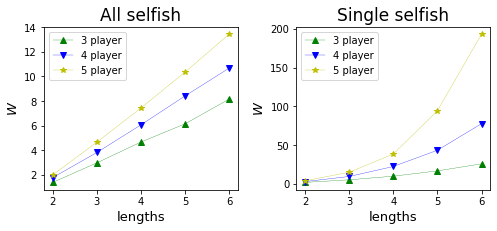

In [185]:
f, axarr = plt.subplots(ncols=2, figsize=(8,3))

lengths = np.arange(2,7)

axarr[0].plot(lengths, data3p[:,0], color='g', linewidth=0.3, marker='^', label='3 player')
axarr[0].plot(lengths, data4p[:,0], color='b', linewidth=0.3, marker='v', label='4 player')
axarr[0].plot(lengths, data5p[:,0], color='y', linewidth=0.3, marker='*', label='5 player')

axarr[1].plot(lengths, data3p[:,1], color='g', linewidth=0.3, marker='^', label='3 player')
axarr[1].plot(lengths, data4p[:,1], color='b', linewidth=0.3, marker='v', label='4 player')
axarr[1].plot(lengths, data5p[:,1], color='y', linewidth=0.3, marker='*', label='5 player')


axarr[0].set_title('All selfish', size=17)
axarr[1].set_title('Single selfish', size=17)

for ax in axarr:
    ax.set_xlabel('lengths', size=13)
    ax.set_ylabel(r'$W$', size=13)
    ax.legend()
    
plt.subplots_adjust(wspace=0.3)
plt.show()

# next experiments

Consider the case where there are three agents. We start in state (0,0,1). Let's say we are agent A. Given agents B & C are going to mine selfishly until a chain reaches length 2. Let's compare the reward for minins selfishly vs mining honestly for agent C. 

In [188]:
iters = int(1e5)
length = 2
players = 3

In [189]:
results = { 'wins' : [], 'losses' : []}
for _ in tqdm(range(iters)):
    state = np.array([0, 0, 1])
    steps = 0
    while length not in state:
        ind = np.random.randint(players)
        state[ind] += 1
        steps += 1
    if state[0] == length:
        results['wins'].append(steps)
    else:
        results['losses'].append(steps)
pwin = len(results['wins']) / iters
lenwin = np.mean(results['wins'])

plose = len(results['losses']) / iters
lenlose = np.mean(results['losses'])

1/3*lenwin - 2 + plose/pwin * 1/3 * lenlose

100%|██████████| 100000/100000 [00:02<00:00, 42075.32it/s]


1.3887126548022302

In [190]:
WHALE_REWARD = 1.5

In [193]:
# simulate rewards for playing selfishly
rewards = []
for _ in tqdm(range(iters)):
    state = np.array([0, 0, 1])
    steps = 0
    while length not in state:
        ind = np.random.randint(players)
        state[ind] += 1
        steps += 1
    if state[0] == length:
        rewards.append(WHALE_REWARD + 2 - 1/3 * steps)
    else:
        rewards.append(-1/3 * steps)
rewards = np.asarray(rewards)

100%|██████████| 100000/100000 [00:02<00:00, 43069.88it/s]


In [194]:
rewards.mean()

0.017791666666666702

In [195]:
# simulate rewards for playing honestly
rewards = []
for _ in tqdm(range(iters)):
    state = np.array([0, 0, 1])
    steps = 0
    honest_blocks = 0
    while length not in state:
        ind = np.random.randint(players)
        if ind == 1:
            state[1] += 1
        elif ind == 0:
            state[2] += 1
            honest_blocks += 1
        else:
            state[2] += 1
        steps += 1
    if state[2] == length:
        rewards.append(honest_blocks - 1/3 * steps)
    else:
        rewards.append(-1/3 * steps)
rewards = np.asarray(rewards)

100%|██████████| 100000/100000 [00:01<00:00, 53192.99it/s]


In [196]:
rewards.mean()

-0.0026399999999999492

So we can say that given everyone else is selfish mining, if we can only mine honestly or selfishly, it is better for us to mine honestly. We can also find our optimal policy by solving the MDP.

In [283]:
import mdptoolbox

0 = (0,0,1,0,0,0)
1 = (0,1,1,0,0,0)
2 = (1,0,1,1,0,0)
3 = (1,1,1,1,0,0)
4 = (0,0,2,0,0,0)
5 = (0,0,2,0,0,1)
6 = (0,1,2,0,0,0)
7 = (0,1,2,0,0,1)
8 = (1,0,2,1,0,0)
9 = (1,0,2,1,0,1)
0 = (1,1,2,1,0,0)
1 = (1,1,2,1,0,1)
2 = (0,2,1,0,0,0)
3 = (1,2,1,1,0,0)
4 = (2,0,1,2,0,0)
5 = (2,1,1,2,0,0)

In [292]:
mapping = {
    0 : (0,0,1,0,0,0),
    1 : (0,1,1,0,0,0),
    2 : (1,0,1,1,0,0),
    3 : (1,1,1,1,0,0),
    4 : (0,0,2,0,0,0),
    5 : (0,0,2,0,0,1),
    6 : (0,1,2,0,0,0),
    7 : (0,1,2,0,0,1),
    8 : (1,0,2,1,0,0),
    9 : (1,0,2,1,0,1),
    10 : (1,1,2,1,0,0),
    11 : (1,1,2,1,0,1),
    12 : (0,2,1,0,0,0),
    13 : (1,2,1,1,0,0),
    14 : (2,0,1,2,0,0),
    15 : (2,1,1,2,0,0),
}

In [284]:
WHALE_REWARD = 0

In [308]:
# actions = my fork(0), longest fork (1) 
transitions = np.zeros((2,16,16))
rewards = np.zeros((2,16,16))

transitions[0,0,1] = 1/3
transitions[0,0,2] = 1/3
transitions[0,0,4] = 1/3
rewards[0,0,1] = -1/3
rewards[0,0,2] = -1/3
rewards[0,0,4] = -1/3

transitions[1,0,1] = 1/3
transitions[1,0,5] = 1/3
transitions[1,0,4] = 1/3
rewards[1,0,1] = -1/3
rewards[1,0,5] = 2/3
rewards[1,0,4] = -1/3

transitions[0,1,3] = 1/3
transitions[0,1,12] = 1/3
transitions[0,1,6] = 1/3
rewards[0,1,3] = -1/3
rewards[0,1,12] = -1/3
rewards[0,1,6] = -1/3

transitions[1,1,6] = 1/3
transitions[1,1,7] = 1/3
transitions[1,1,12] = 1/3
rewards[1,1,6] = -1/3
rewards[1,1,7] = 2/3
rewards[1,1,12] = -1/3

transitions[0,2,3] = 1/3
transitions[0,2,8] = 1/3
transitions[0,2,14] = 1/3
rewards[0,2,3] = -1/3
rewards[0,2,8] = -1/3
rewards[0,2,14] = WHALE_REWARD + 2 - 1/3

transitions[1,2,3] = 1/3
transitions[1,2,8] = 1/3
transitions[1,2,9] = 1/3
rewards[1,2,3] = -1/3
rewards[1,2,8] = -1/3
rewards[1,2,9] = 2/3

transitions[0,3,15] = 1/3
transitions[0,3,13] = 1/3
transitions[0,3,10] = 1/3
rewards[0,3,15] = WHALE_REWARD + 2 - 1/3
rewards[0,3,13] = -1/3
rewards[0,3,10] = -1/3

transitions[1,3,11] = 1/3
transitions[1,3,10] = 1/3
transitions[1,3,13] = 1/3
rewards[1,3,11] = 2/3
rewards[1,3,10] = -1/3
rewards[1,3,13] = -1/3

In [309]:
for i in range(4,16):
    transitions[0,i,i] = 1
    transitions[1,i,i] = 1

In [310]:
for i in range(16):
    for j in range(16):
        if transitions[1,i,j] != 0:
            print(mapping[i], ' -> ', mapping[j], ' rew=', rewards[1,i,j])

(0, 0, 1, 0, 0, 0)  ->  (0, 1, 1, 0, 0, 0)  rew= -0.3333333333333333
(0, 0, 1, 0, 0, 0)  ->  (0, 0, 2, 0, 0, 0)  rew= -0.3333333333333333
(0, 0, 1, 0, 0, 0)  ->  (0, 0, 2, 0, 0, 1)  rew= 0.6666666666666666
(0, 1, 1, 0, 0, 0)  ->  (0, 1, 2, 0, 0, 0)  rew= -0.3333333333333333
(0, 1, 1, 0, 0, 0)  ->  (0, 1, 2, 0, 0, 1)  rew= 0.6666666666666666
(0, 1, 1, 0, 0, 0)  ->  (0, 2, 1, 0, 0, 0)  rew= -0.3333333333333333
(1, 0, 1, 1, 0, 0)  ->  (1, 1, 1, 1, 0, 0)  rew= -0.3333333333333333
(1, 0, 1, 1, 0, 0)  ->  (1, 0, 2, 1, 0, 0)  rew= -0.3333333333333333
(1, 0, 1, 1, 0, 0)  ->  (1, 0, 2, 1, 0, 1)  rew= 0.6666666666666666
(1, 1, 1, 1, 0, 0)  ->  (1, 1, 2, 1, 0, 0)  rew= -0.3333333333333333
(1, 1, 1, 1, 0, 0)  ->  (1, 1, 2, 1, 0, 1)  rew= 0.6666666666666666
(1, 1, 1, 1, 0, 0)  ->  (1, 2, 1, 1, 0, 0)  rew= -0.3333333333333333
(0, 0, 2, 0, 0, 0)  ->  (0, 0, 2, 0, 0, 0)  rew= 0.0
(0, 0, 2, 0, 0, 1)  ->  (0, 0, 2, 0, 0, 1)  rew= 0.0
(0, 1, 2, 0, 0, 0)  ->  (0, 1, 2, 0, 0, 0)  rew= 0.0
(0, 1, 2, 0, 0, 1

In [287]:
np.max(rewards)

1.6666666666666667

In [311]:
np.sum(transitions, axis=2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [312]:
val_iter = mdptoolbox.mdp.ValueIteration(transitions, rewards, discount=1)
val_iter.run()

In [313]:
val_iter.policy

(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [314]:
val_iter.V

(0.0,
 0.0,
 0.4444444444444445,
 0.33333333333333337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

if everyone is playing the above policy, then we have

In [262]:
# actions = my fork(0), longest fork (1) 
transitions = np.zeros((2,16,16))
rewards = np.zeros((2,16,16))

transitions[0,0,1] = 1/3
transitions[0,0,2] = 1/3
transitions[0,0,4] = 1/3
rewards[0,0,1] = -1/3
rewards[0,0,2] = -1/3
rewards[0,0,4] = -1/3

transitions[1,0,1] = 1/3
transitions[1,0,5] = 1/3
transitions[1,0,4] = 1/3
rewards[1,0,1] = -1/3
rewards[1,0,5] = -1/3
rewards[1,0,4] = -1/3

transitions[0,1,3] = 1/3
transitions[0,1,12] = 1/3
transitions[0,1,6] = 1/3
rewards[0,1,3] = -1/3
rewards[0,1,12] = -1/3
rewards[0,1,6] = -1/3

transitions[1,1,6] = 1/3
transitions[1,1,7] = 1/3
transitions[1,1,12] = 1/3
rewards[1,1,6] = -1/3
rewards[1,1,6] = 2/3
rewards[1,1,12] = -1/3

transitions[0,2,8] = 2/3
transitions[0,2,14] = 1/3
rewards[0,2,8] = -1/3
rewards[0,2,14] = WHALE_REWARD + 2 - 1/3

transitions[1,2,8] = 2/3
transitions[1,2,9] = 1/3
rewards[1,2,8] = -1/3
rewards[1,2,9] = 2/3

transitions[0,3,15] = 1/3
transitions[0,3,13] = 1/3
transitions[0,3,10] = 1/3
rewards[0,3,15] = WHALE_REWARD + 2 - 1/3
rewards[0,3,13] = -1/3
rewards[0,3,10] = -1/3

transitions[1,3,11] = 1/3
transitions[1,3,10] = 1/3
transitions[1,3,13] = 1/3
rewards[1,3,11] = 2/3
rewards[1,3,11] = -1/3
rewards[1,3,11] = -1/3

In [263]:
for i in range(4,16):
    transitions[0,i,i] = 1
    transitions[1,i,i] = 1

In [264]:
np.sum(transitions, axis=2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [267]:
val_iter = mdptoolbox.mdp.ValueIteration(transitions, rewards, discount=1)
val_iter.run()

In [270]:
val_iter.policy

(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [271]:
val_iter.V

(-0.0185185185185186,
 0.1111111111111111,
 0.8333333333333331,
 0.833333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)